The dataset has been downloaded into [WEOOct2020all.xls](notebook/datasets/WEOOct2020all.xls) and converted into XLSX format to make it easier to consume.


### Load the data


In [77]:
import pandas as pd

df = pd.read_excel("datasets/WEOOct2020all.xlsx", skipfooter=1)

### Find the top 10 countries that grew "Gross domestic product per capita" the most over the last decade.


In [78]:
# Create a new dataframe that holds each country's gross domestic product per capita (GDPPC) in USD over the years
gdppc = df.loc[df["WEO Subject Code"] == "NGDPDPC"].copy()

# Create a new column that holds each country's GDPPC change over the last 10 years
gdppc["GDPPC Change Over Last Decade"] = pd.to_numeric(gdppc[2022] - gdppc[2013])

# Display top 10 countries with biggest growth
gdppc.nlargest(10, "GDPPC Change Over Last Decade")["Country"]

3609                     Ireland
4509                  Luxembourg
8334               United States
3294               Hong Kong SAR
4824                       Malta
3384                     Iceland
2439                     Estonia
4464                   Lithuania
2844                     Germany
7614    Taiwan Province of China
Name: Country, dtype: object

### Draw OECD countries' "Population" growth over the last decade.


In [79]:
oecd_countries_list = [
    "Australia",
    "Austria",
    "Belgium",
    "Canada",
    "Chile",
    "Colombia",
    "Costa Rica",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Israel",
    "Italy",
    "Japan",
    "South Korea",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Mexico",
    "Netherlands",
    "New Zealand",
    "Norway",
    "Poland",
    "Portugal",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Turkey",
    "United Kingdom",
    "United States",
]
df_oecd_countries = df.loc[df["Country"].isin(oecd_countries_list)]
df_oecd_countries_population = df_oecd_countries.loc[
    df_oecd_countries["Subject Descriptor"] == "Population"
].copy()
df_oecd_countries_population["Population Growth Over Last Decade"] = pd.to_numeric(
    df_oecd_countries_population[2022] - df_oecd_countries_population[2013]
)
df_oecd_countries_population

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After,Population Growth Over Last Decade
387,193.0,AUS,LP,Australia,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office. Australian...,14.802,...,25.172,25.522,25.724,25.875,26.119,26.469,26.836,27.209,2019.0,2.821
432,122.0,AUT,LP,Austria,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,7.54,...,8.885,8.859,8.901,8.946,8.99,9.035,9.08,9.126,2019.0,0.513
747,124.0,BEL,LP,Belgium,Population,"For census purposes, the total population of t...",Persons,Millions,Source: Central Bank Latest actual data: 2019 ...,9.855,...,11.399,11.456,11.49,11.524,11.573,11.619,11.663,11.704,2019.0,0.435
1422,156.0,CAN,LP,Canada,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,24.471,...,36.994,37.527,38.029,38.435,38.849,39.261,39.671,40.08,2019.0,3.815
1557,228.0,CHL,LP,Chile,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,11.174,...,18.751,19.107,19.458,19.718,19.923,20.113,20.297,20.482,2019.0,2.311
1647,233.0,COL,LP,Colombia,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,28.447,...,49.834,50.374,50.878,51.387,51.849,52.316,52.786,53.262,2019.0,4.728
1827,238.0,CRI,LP,Costa Rica,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,2.302,...,5.022,5.075,5.129,5.183,5.238,5.293,5.349,5.406,2019.0,0.505
2007,935.0,CZE,LP,Czech Republic,Population,"For census purposes, the total population of t...",Persons,Millions,Source: Haver Analytics Latest actual data: 20...,NaN,...,10.61,10.65,10.694,10.73,10.758,10.778,10.788,10.79,2019.0,0.242
2052,128.0,DNK,LP,Denmark,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,5.122,...,5.781,5.806,5.812,5.823,5.836,5.85,5.867,5.884,2019.0,0.233
2457,939.0,EST,LP,Estonia,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,NaN,...,1.322,1.325,1.325,1.326,1.326,1.325,1.325,1.324,2019.0,0.008


### Plot the GDP growth figures in separate charts and save them as PNG files.


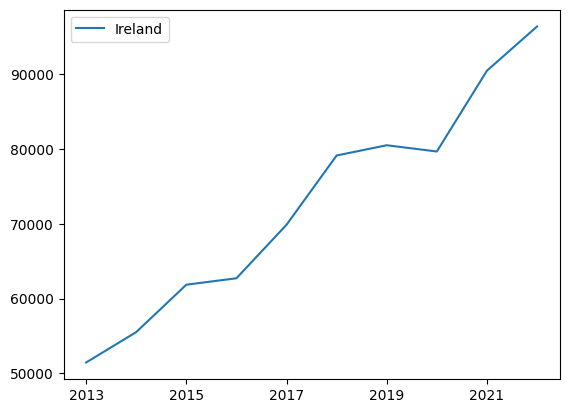

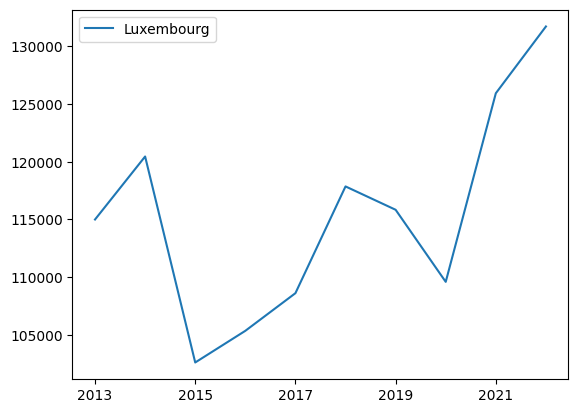

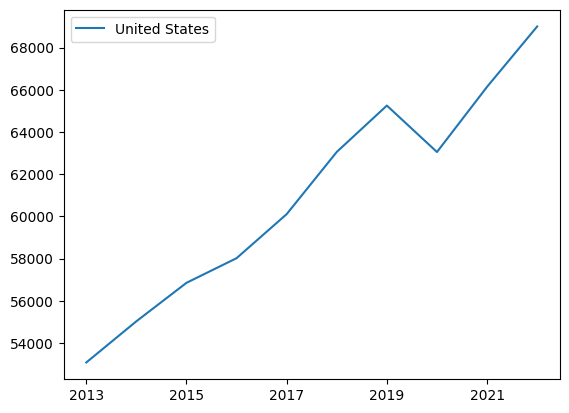

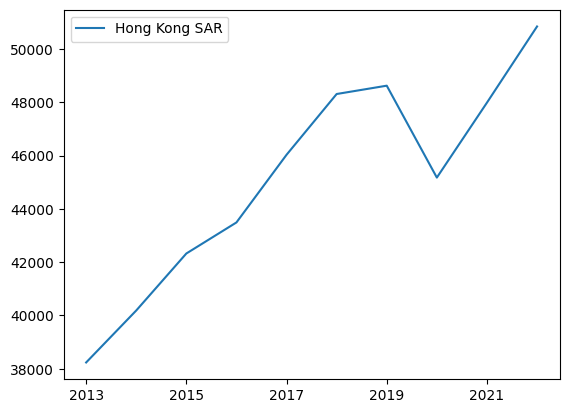

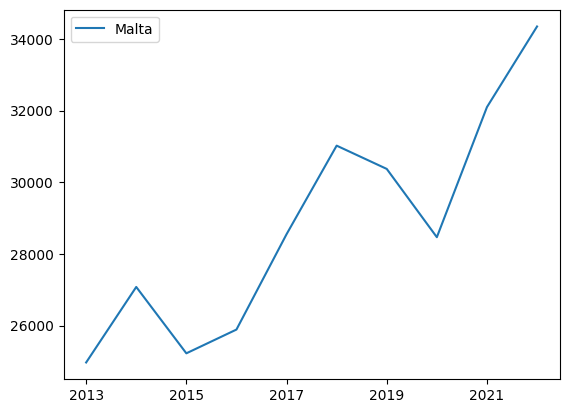

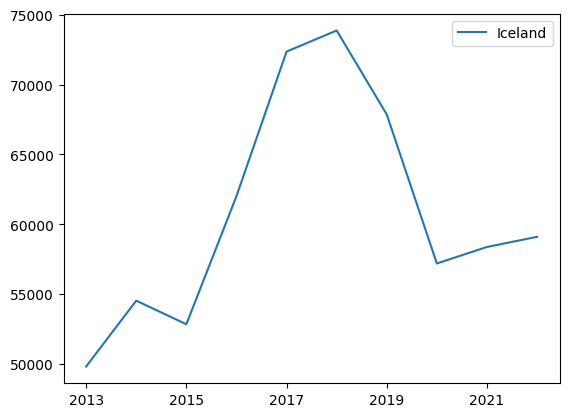

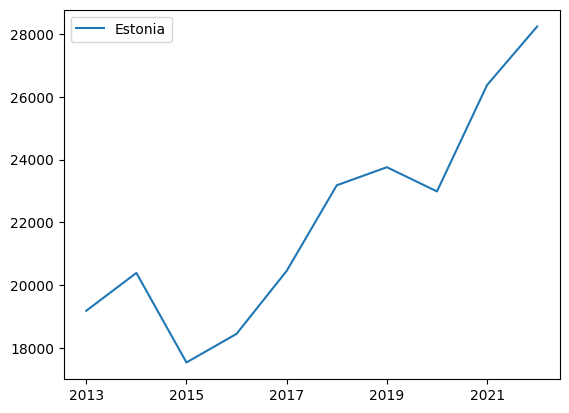

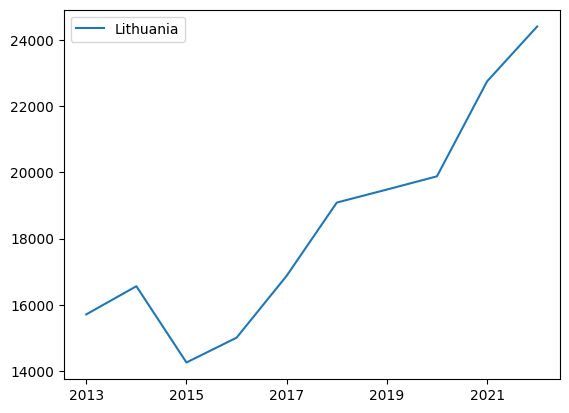

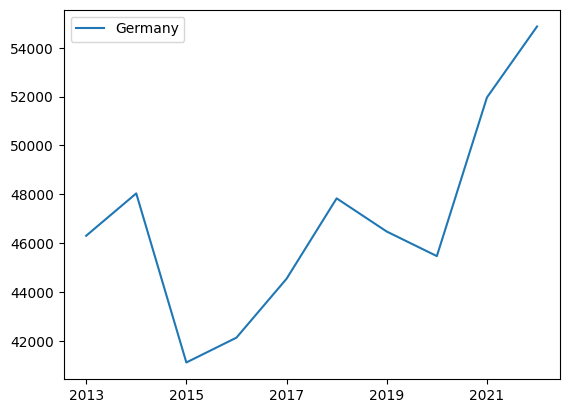

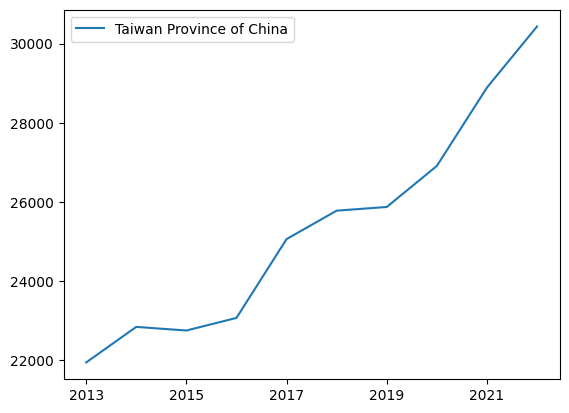

In [80]:
import matplotlib.pyplot as plt

# Create new dataframe with necessary columns and set its index as Country
df_largest_10_gdppc = (
    gdppc.nlargest(10, "GDPPC Change Over Last Decade")
    .set_index("Country")
    .loc[:, 2013:2022]
)
for index, row in df_largest_10_gdppc.iterrows():
    row.plot(legend=True)
    plt.savefig(f"charts/gdp_growth_figures/{index}.png")
    plt.show()

### Create 5 clusters out of the countries using GDP and "Volume of exports of goods".

Draw the charts (x-axis - GDP, y - volume).
Add labels for the top 5 countries according to the GDP on the dots representing countries in each cluster.


In [81]:
df_gdp_exports = df[df["WEO Subject Code"].isin(["NGDP_RPCH", "TXG_RPCH"])].copy()
df_gdp_exports["GDP"] = df[df["WEO Subject Code"] == "NGDP_RPCH"][2022]
df_gdp_exports["Volume"] = df[df["WEO Subject Code"] == "TXG_RPCH"][2022]
df_gdp_exports = df_gdp_exports.groupby("Country")
df_gdp_exports.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,Estimates Start After,GDP,Volume
1,512.0,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.912,-5,4,4.524,4.5,4.009,4.012,2019.0,4.524,NaN
24,512.0,AFG,TXG_RPCH,Afghanistan,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,Source: Various sources: Central Statistical O...,NaN,...,0.068,-27.053,34.963,26.897,9.36,9.244,10.325,2019.0,NaN,26.897
46,914.0,ALB,NGDP_RPCH,Albania,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",2.684,...,2.24,-7.529,6.094,5.818,4.311,3.458,3.429,2018.0,5.818,NaN
69,914.0,ALB,TXG_RPCH,Albania,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,Source: Central Bank Latest actual data: 2019 ...,0,...,-8.454,-5.733,12.205,15.316,14.174,4.383,3.92,2019.0,NaN,15.316
91,612.0,DZA,NGDP_RPCH,Algeria,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",-5.4,...,0.8,-5.461,3.163,2.557,1.149,1.029,0.949,2019.0,2.557,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,474.0,YEM,TXG_RPCH,Yemen,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,Base year: 2005 Primary domestic currency: Yem...,NaN,...,30.832,-23.716,50.959,38.278,44.432,92.322,15.336,NaN,NaN,38.278
8686,754.0,ZMB,NGDP_RPCH,Zambia,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",3.854,...,1.442,-4.831,0.583,1.051,1.214,1.231,1.21,2018.0,1.051,NaN
8709,754.0,ZMB,TXG_RPCH,Zambia,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,"Source: Central Bank. Values from BOP, volumes...",NaN,...,-12.488,-4.66,-2.686,0.904,0.555,2.302,6.109,2018.0,NaN,0.904
8731,698.0,ZWE,NGDP_RPCH,Zimbabwe,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-6.541,-10.378,4.158,2.485,2.16,2.16,2.16,2019.0,2.485,NaN


### Find all the data fields from the year 2015 that are present in most of the countries.


In [82]:
df_2015_not_na = df[~df[2015].isna()]
df_2015_not_na["WEO Subject Code"].unique()

array(['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D',
       'NGDPRPC', 'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC', 'PPPSH',
       'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI', 'PCPIPCH', 'PCPIE',
       'PCPIEPCH', 'TM_RPCH', 'TMG_RPCH', 'TX_RPCH', 'TXG_RPCH', 'LP',
       'GGR', 'GGR_NGDP', 'GGX', 'GGX_NGDP', 'GGXCNL', 'GGXCNL_NGDP',
       'GGXONLB', 'GGXONLB_NGDP', 'GGXWDG', 'GGXWDG_NGDP', 'NGDP_FY',
       'BCA', 'BCA_NGDPD', 'LUR', 'GGXWDN', 'GGXWDN_NGDP', 'GGSB',
       'GGSB_NPGDP', 'NGAP_NPGDP', 'LE', 'FLIBOR6'], dtype=object)

### Create a predictor (use scikit) to predict GDP per capita (exclude other GDP-related fields).


In [83]:
import numpy as np

# Create a dataframe of the relevant values
df_gdppc = df.loc[
    ~df["WEO Subject Code"].isin(
        [
            "NGDP_R",
            "NGDP_RPCH",
            "NGDP",
            "NGDPD",
            "PPPGDP",
            "NGDP_D",
            "NGDPRPC",
            "NGDPRPPPPC",
            "NGDPPC",
            "PPPPC",
            "NGAP_NPGDP",
            "PPPSH",
            "PCPIPCH",
            "PCPIEPCH",
            "FLIBOR6",
            "TM_RPCH",
            "TMG_RPCH",
            "TX_RPCH",
            "TXG_RPCH",
            "GGR_NGDP",
            "GGX_NGDP",
            "GGXCNL_NGDP",
            "GGSB_NPGDP",
            "GGXONLB_NGDP",
            "GGXWDN_NGDP",
            "GGXWDG_NGDP",
            "BCA_NGDPD",
        ]
    )
].copy()


# Drop "Estimates Start After" column, and last row
df_gdppc = df_gdppc.drop("Estimates Start After", axis=1)
df_gdppc.drop(df_gdppc.tail(1).index, inplace=True)

In [84]:
# Add Continent data to dataframe

df2 = pd.read_csv("datasets/countries of the world.csv")

df2["Region"] = df2["Region"].str.strip()
df2["Country"] = df2["Country"].str.strip()
df2["Country"] = df2["Country"].str.replace("&", "and")
df_gdppc["Country"] = df_gdppc["Country"].str.strip()
continents_dict = pd.Series(df2["Region"].values, index=df2["Country"]).to_dict()

df_gdppc["Continent"] = df_gdppc["Country"].map(continents_dict)

In [85]:
# Replace the years that have 0 as a value with the mean of each column
df_gdppc_years = df_gdppc.loc[:, 1980:2025]
df_gdppc_years.replace(0, np.nan, inplace=True)
df_gdppc_years.replace("--", np.nan, inplace=True)
df_gdppc_years.fillna(df_gdppc_years.median(), inplace=True)
df_gdppc.loc[:, 1980:2025] = df_gdppc_years

# Transform the dataframe to have relevant fields and headers
df2_gdppc = df_gdppc.drop(
    [
        "WEO Country Code",
        "ISO",
        "Subject Descriptor",
        "Subject Notes",
        "Units",
        "Scale",
        "Country/Series-specific Notes",
    ],
    axis=1,
)
df2_gdppc = df2_gdppc.set_index(
    ["WEO Subject Code", "Country", "Continent"], drop=True
).unstack(["Country", "Continent"])
df2_gdppc = df2_gdppc.T
df2_gdppc

WEO Subject Code                                   BCA          GGR  \
     Country             Continent                                    
1980 Afghanistan         ASIA (EX. NEAR EAST)  11.6125      11.6125   
     Albania             EASTERN EUROPE          0.001      11.6125   
     Algeria             NORTHERN AFRICA         0.242      11.6125   
     Angola              SUB-SAHARAN AFRICA       0.07      11.6125   
     Antigua and Barbuda LATIN AMER. & CARIB   11.6125      11.6125   
...                                                ...          ...   
2025 Vietnam             ASIA (EX. NEAR EAST)   -0.009  2521842.977   
     West Bank and Gaza  NaN                    -2.337       15.896   
     Yemen               NEAR EAST              -0.052     6086.644   
     Zambia              SUB-SAHARAN AFRICA      0.136      111.124   
     Zimbabwe            SUB-SAHARAN AFRICA      -0.54      159.244   

WEO Subject Code                                     GGSB          GGX  \
     Country             Continent                                       
1980 Afghanistan         ASIA (EX. NEAR EAST)     11.6125      11.6125   
     Albania             EASTERN EUROPE           11.6125      11.6125   
     Algeria             NORTHERN AFRICA          11.6125      11.6125   
     Angola              SUB-SAHARAN AFRICA       11.6125      11.6125   
     Antigua and Barbuda LATIN AMER. & CARIB      11.6125      11.6125   
...                                                   ...          ...   
2025 Vietnam             ASIA (EX. NEAR EAST) -445654.547  2967497.525   
     West Bank and Gaza  NaN                       30.737       21.834   
     Yemen               NEAR EAST                 30.737     6776.621   
     Zambia              SUB-SAHARAN AFRICA        30.737      111.476   
     Zimbabwe            SUB-SAHARAN AFRICA        30.737      163.522   

WEO Subject Code                                   GGXCNL     GGXONLB  \
     Country             Continent                                      
1980 Afghanistan         ASIA (EX. NEAR EAST)     11.6125     11.6125   
     Albania             EASTERN EUROPE           11.6125     11.6125   
     Algeria             NORTHERN AFRICA          11.6125     11.6125   
     Angola              SUB-SAHARAN AFRICA       11.6125     11.6125   
     Antigua and Barbuda LATIN AMER. & CARIB      11.6125     11.6125   
...                                                   ...         ...   
2025 Vietnam             ASIA (EX. NEAR EAST) -445654.547 -208868.686   
     West Bank and Gaza  NaN                       -5.938      30.737   
     Yemen               NEAR EAST               -689.976      574.84   
     Zambia              SUB-SAHARAN AFRICA        -0.352      34.822   
     Zimbabwe            SUB-SAHARAN AFRICA        -4.277       5.662   

WEO Subject Code                                    GGXWDG     GGXWDN  \
     Country             Continent                                      
1980 Afghanistan         ASIA (EX. NEAR EAST)      11.6125    11.6125   
     Albania             EASTERN EUROPE            11.6125    11.6125   
     Algeria             NORTHERN AFRICA           11.6125    11.6125   
     Angola              SUB-SAHARAN AFRICA        11.6125    11.6125   
     Antigua and Barbuda LATIN AMER. & CARIB       11.6125    11.6125   
...                                                    ...        ...   
2025 Vietnam             ASIA (EX. NEAR EAST)  6156294.632     30.737   
     West Bank and Gaza  NaN                        27.469     30.737   
     Yemen               NEAR EAST               19532.581  19445.835   
     Zambia              SUB-SAHARAN AFRICA        579.044    495.534   
     Zimbabwe            SUB-SAHARAN AFRICA         22.644     30.737   

WEO Subject Code                                    LE       LP      LUR  \
     Country             Continent                                         
1980 Afghanistan         ASIA (EX. NEAR EAST)  11.6125  11.61

In [86]:
# Create test and train data
from sklearn.model_selection import train_test_split

X = df2_gdppc.drop("NGDPDPC", axis=1)
y = df2_gdppc["NGDPDPC"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, random_state=27
)

In [87]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8373409984211928

In [88]:
# Show prediction error (MSE) on the training and the testing data sets.

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
print(f"Prediction error (MSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")

Prediction error (MSE): 6190.590346735799


In [89]:
# Name the fields that were used during training.

X_train.columns

Index(['BCA', 'GGR', 'GGSB', 'GGX', 'GGXCNL', 'GGXONLB', 'GGXWDG', 'GGXWDN',
       'LE', 'LP', 'LUR', 'NGDP_FY', 'NGSD_NGDP', 'NID_NGDP', 'PCPI', 'PCPIE',
       'PPPEX'],
      dtype='object', name='WEO Subject Code')

In [90]:
# Find the top 5 fields/features that contribute the most to the predictions.

sorted_importance = model.feature_importances_.argsort()
X.columns[sorted_importance][::-1][:5]

Index(['BCA', 'GGSB', 'LE', 'LUR', 'GGXWDN'], dtype='object', name='WEO Subject Code')

In [91]:
# Train another predictor that uses those top 5 features.

X = df2_gdppc.loc[:, ['BCA', 'GGSB', 'LE', 'LUR', 'GGXWDN']]
y = df2_gdppc["NGDPDPC"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, random_state=27
)

In [92]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7115693133092884

In [93]:
# Save the predictor in a file.

import joblib

joblib.dump(model, "models/gdp_predictor.pkl")
joblib.dump(
    X.columns, "models/required_columns.pkl"
)  # Will come in handy when using the API

['models/required_columns.pkl']